## San Francisco 

https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import tilemapbase
import descartes
import shapely.ops

In [5]:
datadir = os.path.join("/media", "disk", "Data")
frame = gpd.io.file.read_file(os.path.join(datadir, "SF_Neighborhoods.geojson"))
frame.head()

,geometry,link,name
0,(POLYGON ((-122.4934552679999 37.7835181710000...,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff
1,(POLYGON ((-122.4871507149999 37.7837854270000...,None,Lake Street
2,(POLYGON ((-122.4775801709999 37.8109931130000...,http://www.nps.gov/prsf/index.htm,Presidio National Park
3,(POLYGON ((-122.4724105299999 37.7873465390000...,None,Presidio Terrace
4,(POLYGON ((-122.4726257899999 37.7863148060000...,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond


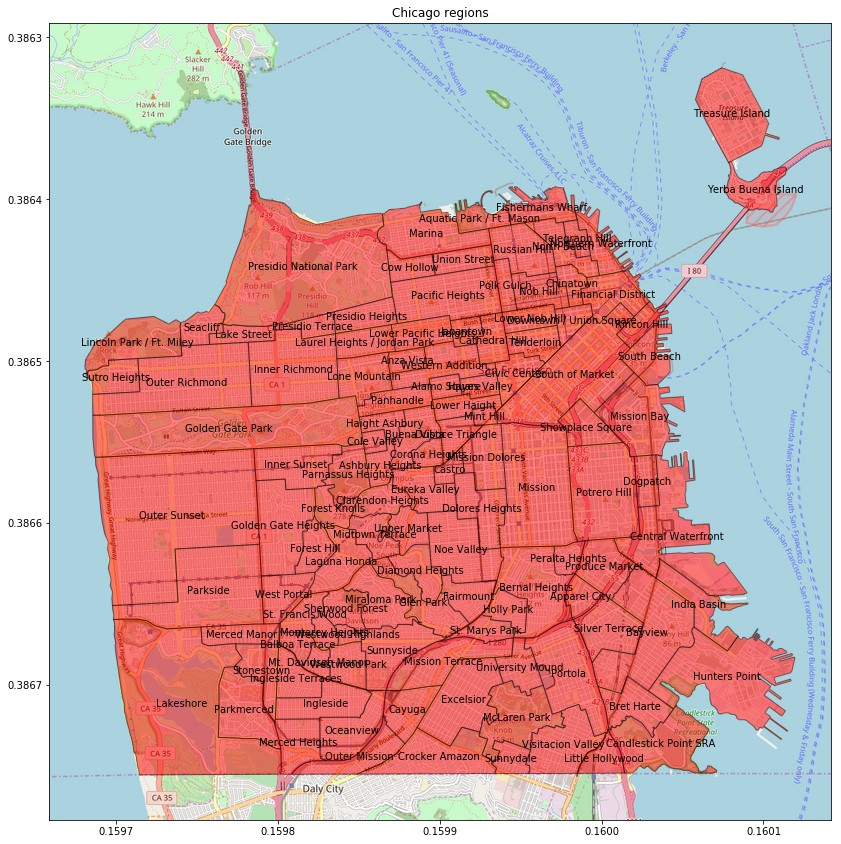

In [28]:
fig, ax = plt.subplots(figsize=(14,15))
ex = tilemapbase.extent_from_frame(frame, 5)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax, alpha=1)
for _, row in frame.iterrows():
    geo = row.geometry
    geo = shapely.ops.transform(lambda x, y, *z : tilemapbase.project(x,y), geo)
    p = descartes.PolygonPatch(geo, ec="black", fc="red", alpha=0.5)
    ax.add_patch(p)
    x, y = row.geometry.centroid.coords[0]
    x, y = tilemapbase.project(x, y)
    ax.text(x, y, row["name"], horizontalalignment='center', verticalalignment='center')
ax.set_title("Chicago regions")
ax.set_aspect(1)
None

## How to group

This seems confusing, compare [Wikipedia article](https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco).

It might be easier to use the
- Quadrants data: https://data.sfgov.org/Geographic-Locations-and-Boundaries/Planning-Department-Neighborhood-Quadrants/x89n-qawp/data
- See http://sf-planning.org/permits-zoning-staff#quadrants

In [30]:
datadir = os.path.join("/media", "disk", "Data")
frame = gpd.io.file.read_file(os.path.join(datadir, "SF_Neighborhood_Quadrants.geojson"))
frame

,geometry,globalid,id,objectid,objectid_1,quad,shape_area,shape_len
0,(POLYGON ((-122.3970345263727 37.7840517144461...,{F27C8EDD-E046-4CD1-9071-8159E6102624},0,641,4,SE,362268282.883,227055.35836
1,(POLYGON ((-122.4199157333907 37.8115742933694...,{B4EECB96-F331-4B1B-99BC-E2AB05E2B09B},0,642,3,NE,89271860.5954,99030.8515062
2,(POLYGON ((-122.4777381800526 37.8109429674687...,{1B40529A-8F68-472A-9DB0-7C07C9C8DE0A},0,643,1,NW,338207863.134,116095.118353
3,(POLYGON ((-122.4245810894854 37.7697346960748...,{7C611B7F-5452-4456-9100-60B437F86B72},0,644,2,SW,498989359.983,114854.453545


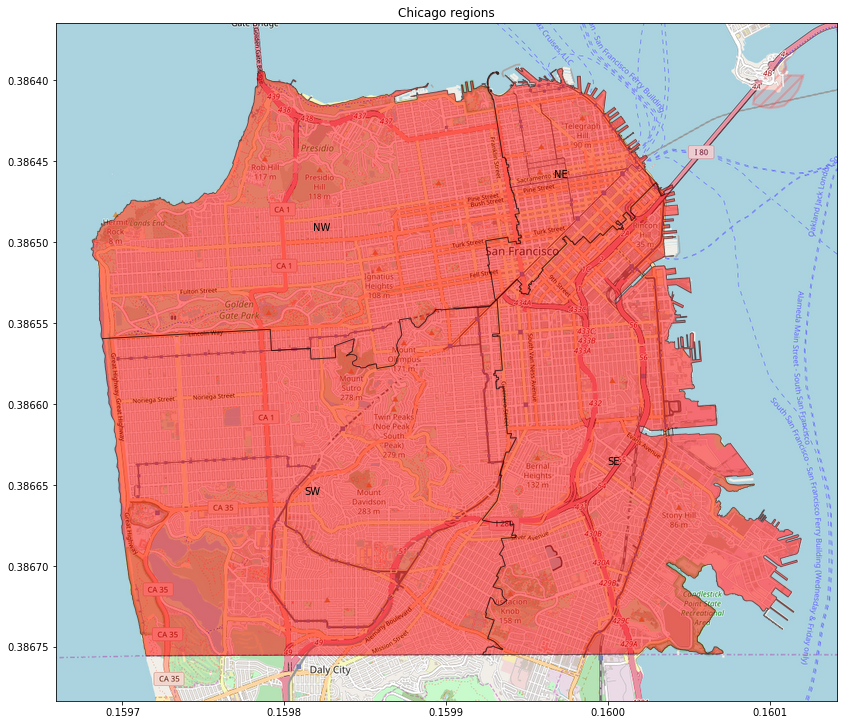

In [32]:
fig, ax = plt.subplots(figsize=(14,15))
ex = tilemapbase.extent_from_frame(frame, 5)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=800)
plotter.plot(ax, alpha=1)
for _, row in frame.iterrows():
    geo = row.geometry
    geo = shapely.ops.transform(lambda x, y, *z : tilemapbase.project(x,y), geo)
    p = descartes.PolygonPatch(geo, ec="black", fc="red", alpha=0.5)
    ax.add_patch(p)
    x, y = row.geometry.centroid.coords[0]
    x, y = tilemapbase.project(x, y)
    ax.text(x, y, row["quad"], horizontalalignment='center', verticalalignment='center')
ax.set_title("Chicago regions")
ax.set_aspect(1)
None

# To think about

Try to "naturally" group neighbourhoods by event count and geographic contiguity.